In [28]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
# Step 1: Load the dataset
data = pd.read_csv("climatedatawithdate.csv")

# check for missing values
print(data.isnull().sum())
# drop rows with missing values
data.dropna(inplace=True)

puttalam    0
tauu        0
rlus        0
sfcWind     0
rsuscs      0
rsus        0
rsdscs      0
prw         0
hurs        0
rtmt        0
ua_850      0
evspsbl     0
vas         0
clwvi       0
rsutcs      0
rsds        0
ua_500      0
va_850      0
pr          0
huss        0
sbl         0
zg_500      0
wap_500     0
clt         0
va_500      0
clivi       0
ta_500      0
psl         0
hfls        0
hfss        0
prc         0
ps          0
rlds        0
rldcs       0
rlut        0
rlutcs      0
rsdt        0
rsut        0
ta_850      0
tas         0
tasmax      0
tasmin      0
tauv        0
tro3_500    0
tro3_850    0
ts          0
uas         0
wap_850     0
zg_850      0
date        0
dtype: int64


In [30]:
# Step 3: Split the data into training and test sets based on dates
train_data = data[data['date'] < '12/01/2015']
test_data = data[data['date'] >= '12/01/2015']

In [31]:
# Step 4: Separate input (conditions) and output (precipitation) variables
X_train = train_data.drop(columns=["puttalam", "date"])
y_train = train_data["puttalam"]
X_test = test_data.drop(columns=["puttalam", "date"])
y_test = test_data["puttalam"]

In [32]:
# Step 5: Scale the input variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Step 6: Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [34]:
# Step 7: Create a custom ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

input_size = X_train.shape[1]
hidden_size = 64 # Adjust the hidden size based on your requirements
output_size = 1

model = ANNModel(input_size, hidden_size, output_size)

In [35]:
# Step 8: Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [46]:
# Step 9: Train the ANN model
num_epochs = 20
batch_size = 64

for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Perform mini-batch training
    for i in range(0, X_train.shape[0], batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        loss.backward()
        optimizer.step()
        
    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch: 1/20, Loss: 45493.12109375
Epoch: 2/20, Loss: 45488.80859375
Epoch: 3/20, Loss: 45484.76171875
Epoch: 4/20, Loss: 45480.92578125
Epoch: 5/20, Loss: 45477.2578125
Epoch: 6/20, Loss: 45473.72265625
Epoch: 7/20, Loss: 45470.296875
Epoch: 8/20, Loss: 45466.953125
Epoch: 9/20, Loss: 45463.66796875
Epoch: 10/20, Loss: 45460.4375
Epoch: 11/20, Loss: 45457.23046875
Epoch: 12/20, Loss: 45454.0390625
Epoch: 13/20, Loss: 45450.875
Epoch: 14/20, Loss: 45447.72265625
Epoch: 15/20, Loss: 45444.56640625
Epoch: 16/20, Loss: 45441.40625
Epoch: 17/20, Loss: 45438.25390625
Epoch: 18/20, Loss: 45435.1015625
Epoch: 19/20, Loss: 45431.9296875
Epoch: 20/20, Loss: 45428.75390625


In [47]:
# Step 10: Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item()}")

Test Loss: 12656.060546875


In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

Evaluation Metrics:
Mean Squared Error (MSE): 12656.06
R-squared Score (R2): -0.7073748545430165


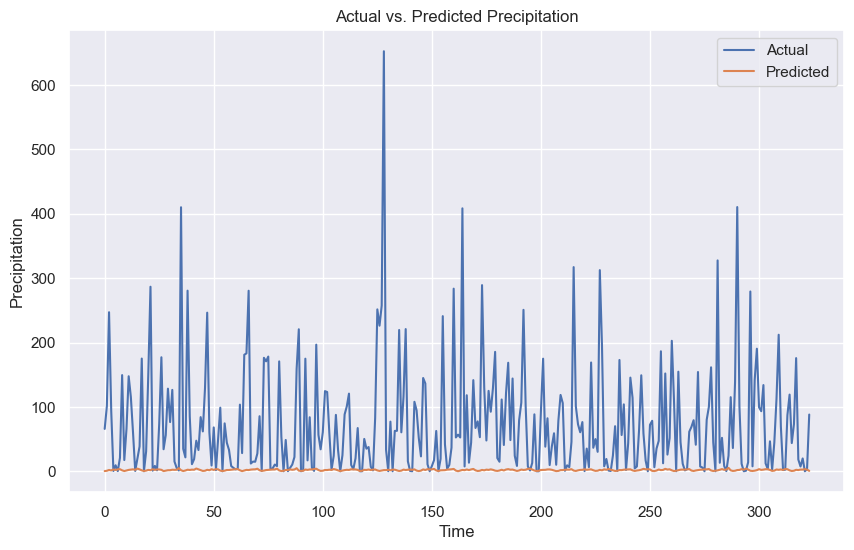

In [49]:
# Step 11: Analyze the results (calculate evaluation metrics, visualize predictions, etc.)
model.eval()
with torch.no_grad():
    # Make predictions on the test set
    test_predictions = model(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)

    print("Evaluation Metrics:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared Score (R2):", r2)

    # Visualize the predictions
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(test_predictions, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Precipitation')
    plt.title('Actual vs. Predicted Precipitation')
    plt.legend()
    plt.show()

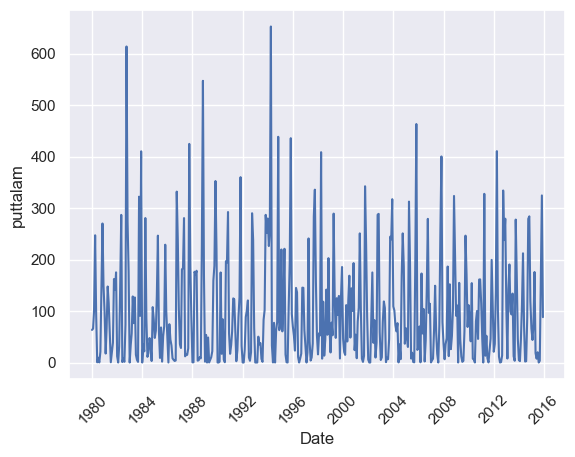

In [40]:
# Autoregressive Moving Average model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import datetime

weather = pd.read_csv("climatedatawithdate.csv")

weather.index = pd.to_datetime(weather['date'])

sns.set()

plt.ylabel('puttalam')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(weather.index, weather['puttalam'], )

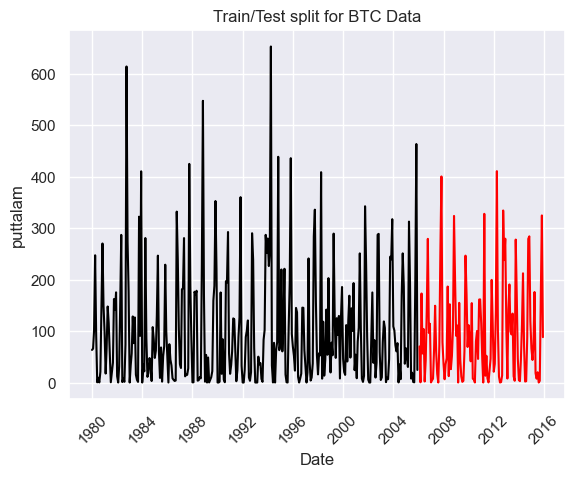

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

weather['date'] = pd.to_datetime(weather['date'])  # Convert 'Date' column to DateTime format

train = weather[weather['date'] < pd.to_datetime("1/1/2006")]
test = weather[weather['date'] > pd.to_datetime("1/1/2006")]

plt.plot(train['date'], train['puttalam'], color="black")
plt.plot(test['date'], test['puttalam'], color="red")
plt.ylabel('puttalam')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()


NameError: name 'y_pred_out' is not defined

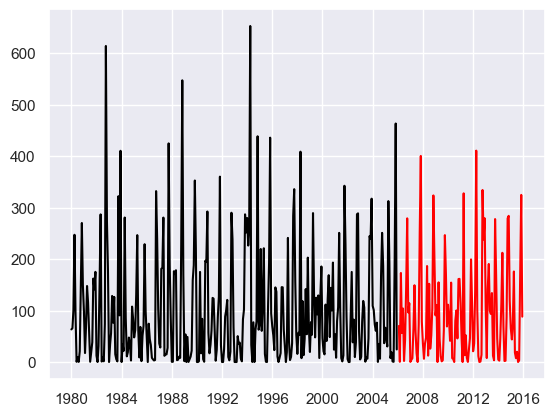

In [42]:
plt.plot(train['date'], train['puttalam'], color="black")
plt.plot(test['date'], test['puttalam'], color="red")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()